Лабораторна робота 6
Застосування numpy

Терещенко Микола ФБ-33

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Завдання 1. Знаходження коефіцієнтів методом найменших квадратів

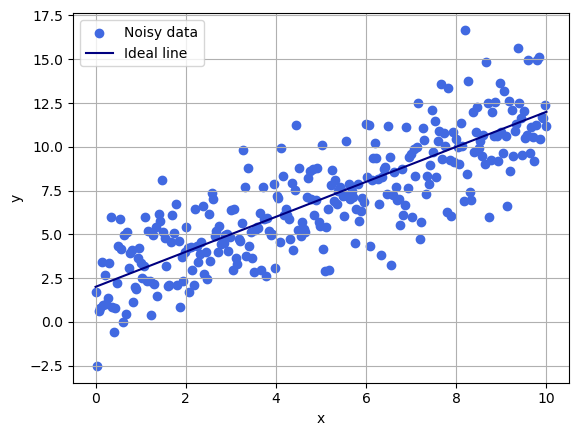

In [2]:
k = 1
b = 2
N = 300


# xx generation
x = np.linspace(0, 10, N)\
# yy generation
noise = np.random.normal(0, 2, N)
y = k * x + b + noise

# Plotting
plt.scatter(x, y, label='Noisy data',color='royalblue')
plt.plot(x, k * x + b, color='navy', label='Ideal line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Реалізація відбувається через обчислення за формулами:


$a=\frac{\sum_{i=1}^{n}(y)-b\sum_{i=1}^{n}(x)}{n}$

$b=\frac{n\sum_{i=1}^{n}(xy)-(\sum_{i=1}^{n}(x))(\sum_{i=1}^{n}(y))}{n\sum_{i=1}^{n}(x^2)-(\sum_{i=1}^{n}(x))^2}$

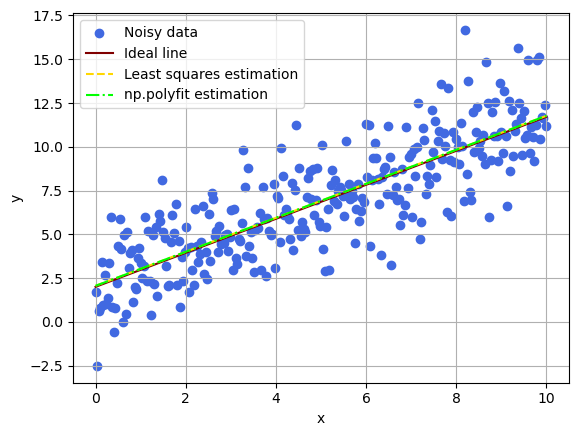

Ideal line params: k = 1, b = 2 

Least squares estimation: 
 Estimated slope = 0.97146 
 Estimated y-intercept = 2.05878

np.polyfit estimation: 
 Polyfit estimated slope =  0.97146 
 Polyfit estimated y-intercept = 2.05878 


In [3]:
# kk = estimated_slope
# bb = estimated_y-intercept


def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    # coefs calculation 
    kk = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb = (sum_y - kk * sum_x) / n
    
    return kk, bb

# least square method calculation
kk, bb = least_squares_method(x, y)

# polyfit estimation
coefficients = np.polyfit(x, y, 1)
k_polyfit = coefficients[0]
b_polyfit = coefficients[1]

# plotting
plt.scatter(x, y, label='Noisy data',color='royalblue')
plt.plot(x, kk * x + b, color='maroon', label='Ideal line')
plt.plot(x, kk * x + bb, color='gold', linestyle='--', label='Least squares estimation')
plt.plot(x, k_polyfit * x + b_polyfit, color='lime', linestyle='-.', label='np.polyfit estimation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Ideal line params: k = {k}, b = {b} \n")

print(f"Least squares estimation: \n Estimated slope = {kk:.5f} \n Estimated y-intercept = {bb:.5f}\n")
print(f"np.polyfit estimation: \n Polyfit estimated slope =  {k_polyfit:.5f} \n Polyfit estimated y-intercept = {b_polyfit:.5f} ")

Завдання 2. Реалізація методу градієнтного спуску

1.1438029448474405 0.9163596292281605


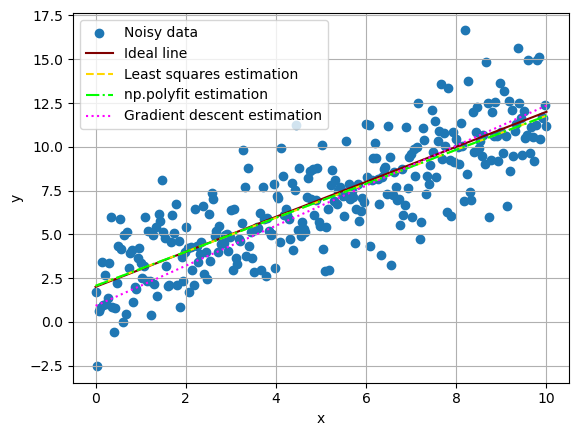

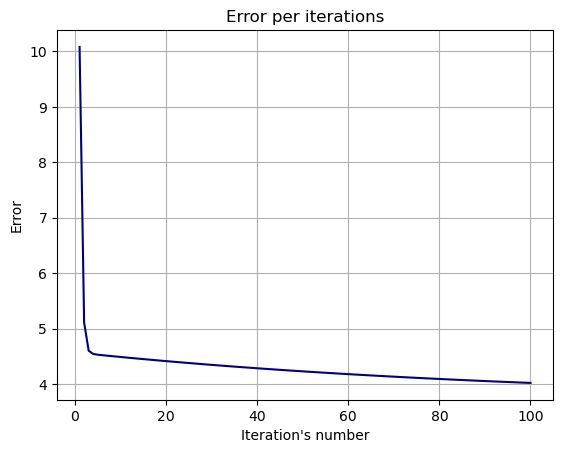

In [4]:
def gradient_descent(x, y, learning_rate, n_iter):
# Initial coefs
    kk = 0
    bb = 0
    n = len(x)

    # Gradient descent func itself
    for _ in range(n_iter):
        y_pred = kk * x + bb
        kk_g = (-2/n) * np.sum(x * (y - y_pred))
        bb_g = (-2/n) * np.sum(y - y_pred)

        kk -= learning_rate * kk_g
        bb -= learning_rate * bb_g
    
    return kk, bb

# optimal params for gradient descent
learning_rate = 0.01
n_iter = 100

# gradient 
kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

# show all estimations
plt.scatter(x, y, label='Noisy data')
plt.plot(x, k * x + b, color='maroon', label='Ideal line')
plt.plot(x, kk * x + bb, color='gold', linestyle='--', label='Least squares estimation')
plt.plot(x, k_polyfit * x + b_polyfit, color='lime', linestyle='-.', label='np.polyfit estimation')
plt.plot(x, kk_gradient * x + bb_gradient, color='fuchsia', linestyle=':', label='Gradient descent estimation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# error calculation
def loss_calculation(x, y, kk, bb):
    y_pred = kk * x + bb
    return np.mean((y_pred - y) ** 2)


# error graph
errors = []
iterations = range(1, n_iter + 1)

for i in iterations:

    kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, i)
    
    error = loss_calculation(x, y, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='navy')
plt.xlabel('Iteration\'s number')
plt.ylabel('Error')
plt.title('Error per iterations')
plt.grid(True)
plt.show()